In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib
import matplotlib.pyplot as plt

In [4]:
# Importing Tensorflow
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


In [5]:
!pip install git+https://github.com/tensorflow/docs # Use some functions from tensorflow_docs

  Cloning https://github.com/tensorflow/docs to /private/var/folders/kk/wxspytjs2k33p0v5j22mylhm0000gn/T/pip-req-build-edssp4jo
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /private/var/folders/kk/wxspytjs2k33p0v5j22mylhm0000gn/T/pip-req-build-edssp4jo
  Resolved https://github.com/tensorflow/docs to commit 42550ed44d5bfa9f372bc5ee7fb86b8953832e9e
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2024.2.5.73858-py3-none-any.whl size=182446 sha256=7b1f0c4bcd27ec2560cfdd906d7192c7c29f24026f034361059b590b69ddf9da
  Stored in directory: /private/var/folders/kk/wxspytjs2k33p0v5j22mylhm0000gn/T/pip-ephem-wheel-cache-fz8z_o7f/wheels/34/53/89/3db54cf97ce0f0261aaab3fdc12a847ea0879d34edf373e2c5
Successfully built tensorflow-docs
  Attempting uninstall: tensorflow-docs
    Found existing installation: tensorflow-docs 2024.1.17.4828
    Uninstalling tensorflow-docs-2024.1.17.4828:
      Successfully u

In [6]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

In [7]:
#plotly used for plotting Interactive Graphs
!pip install plotly
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

In [8]:
dataset = pd.read_csv('final_data.csv')
dataset

red  green  blue  label
0      20    139   240   Blue
1     174     83    72  Brown
2     144    249   131  Green
3     168     25   156   Pink
4      30    182   136  Green
...   ...    ...   ...    ...
5047   26     26    26  Black
5048   27     27    27  Black
5049   28     28    28  Black
5050   29     29    29  Black
5051   30     30    30  Black

[5052 rows x 4 columns]

In [9]:
dataset.describe()

red        green         blue
count  5052.000000  5052.000000  5052.000000
mean    127.416073   126.316310   128.296912
std      73.958449    74.927131    74.174008
min       0.000000     0.000000     0.000000
25%      63.000000    60.000000    63.000000
50%     128.000000   127.000000   130.000000
75%     191.000000   192.000000   192.000000
max     255.000000   255.000000   255.000000

In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   red     5052 non-null   int64 
 1   green   5052 non-null   int64 
 2   blue    5052 non-null   int64 
 3   label   5052 non-null   object
dtypes: int64(3), object(1)
memory usage: 158.0+ KB


In [11]:
#To find whether null entries are present 
dataset.isnull().sum()

red      0
green    0
blue     0
label    0
dtype: int64

In [12]:
dataset.label.unique()

array(['Blue', 'Brown', 'Green', 'Pink', 'Yellow', 'Orange', 'Purple',
       'Red', 'Grey', 'White', 'Black'], dtype=object)

In [13]:
# One-Hot-Encoding
dataset = pd.get_dummies(dataset, columns=['label'])
dataset

red  green  blue  label_Black  label_Blue  label_Brown  label_Green  \
0      20    139   240        False        True        False        False   
1     174     83    72        False       False         True        False   
2     144    249   131        False       False        False         True   
3     168     25   156        False       False        False        False   
4      30    182   136        False       False        False         True   
...   ...    ...   ...          ...         ...          ...          ...   
5047   26     26    26         True       False        False        False   
5048   27     27    27         True       False        False        False   
5049   28     28    28         True       False        False        False   
5050   29     29    29         True       False        False        False   
5051   30     30    30         True       False        False        False   

      label_Grey  label_Orange  label_Pink  label_Purple  label_Red  \
0          False         False       False         False      False   
1          False         False       False         False      False   
2          False         False       False         False      False   
3          False         False        True         False      False   
4          False         False       False         False      False   
...          ...           ...         ...           ...        ...   
5047       False         False       False         False      False   
5048       False         False       False         False      False   
5049       False         False       False         False      False   
5050       False         False       False         False      False   
5051       False         False       False         False      False   

      label_White  label_Yellow  
0           False         False  
1           False         False  
2           False         False  
3           False         False  
4           False         False  
...           ...           ...  
5047        False         False  
5048        False         False  
5049        False         False  
5050        False         False  
5051        False         False  

[5052 rows x 14 columns]

In [14]:
dataset = dataset[['red', 'green', 'blue', 'label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]
dataset

red  green  blue  label_Red  label_Green  label_Blue  label_Yellow  \
0      20    139   240      False        False        True         False   
1     174     83    72      False        False       False         False   
2     144    249   131      False         True       False         False   
3     168     25   156      False        False       False         False   
4      30    182   136      False         True       False         False   
...   ...    ...   ...        ...          ...         ...           ...   
5047   26     26    26      False        False       False         False   
5048   27     27    27      False        False       False         False   
5049   28     28    28      False        False       False         False   
5050   29     29    29      False        False       False         False   
5051   30     30    30      False        False       False         False   

      label_Orange  label_Pink  label_Purple  label_Brown  label_Grey  \
0            False       False         False        False       False   
1            False       False         False         True       False   
2            False       False         False        False       False   
3            False        True         False        False       False   
4            False       False         False        False       False   
...            ...         ...           ...          ...         ...   
5047         False       False         False        False       False   
5048         False       False         False        False       False   
5049         False       False         False        False       False   
5050         False       False         False        False       False   
5051         False       False         False        False       False   

      label_Black  label_White  
0           False        False  
1           False        False  
2           False        False  
3           False        False  
4           False        False  
...           ...          ...  
5047         True        False  
5048         True        False  
5049         True        False  
5050         True        False  
5051         True        False  

[5052 rows x 14 columns]

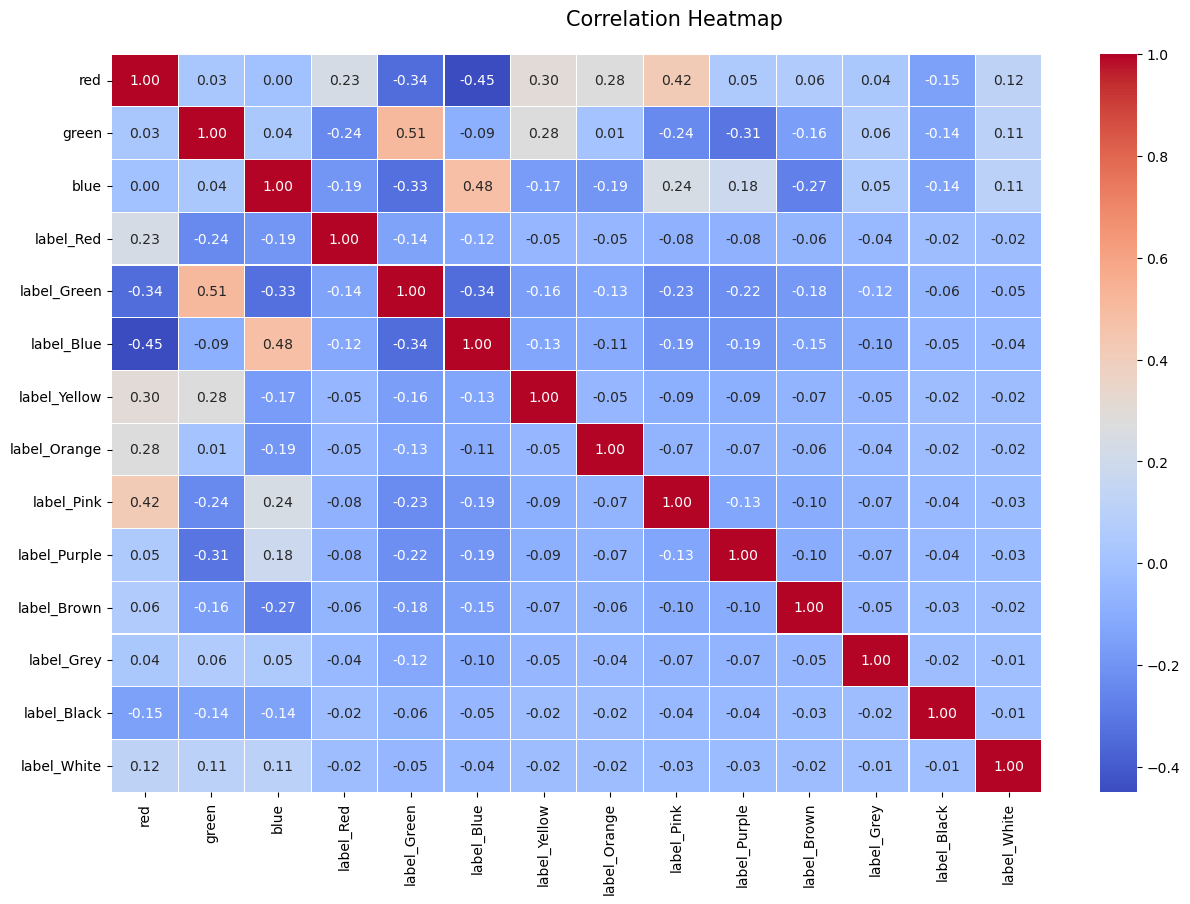

In [15]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 9))
corr = dataset.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=15)
     

In [16]:
train_dataset = dataset.sample(frac=0.8, random_state=9) #train = 80%,  random_state = any int value means every time when you run your program you will get the same output for train and test dataset, random_state is None by default which means every time when you run your program you will get different output because of splitting between train and test varies within 
test_dataset = dataset.drop(train_dataset.index) #remove train_dataset from dataframe to get test_dataset
train_dataset

red  green  blue  label_Red  label_Green  label_Blue  label_Yellow  \
4232  243      2   187      False        False       False         False   
4898  200     89     0      False        False       False         False   
1959  147    118    80      False        False       False         False   
3477   30    103    73      False         True       False         False   
4167  222    205    78      False        False       False          True   
...   ...    ...   ...        ...          ...         ...           ...   
2414   42      8    85      False        False        True         False   
2610  162    159   216      False        False        True         False   
1739  138     48   233      False        False       False         False   
3033    9     46   248      False        False        True         False   
1601  141    244   244      False        False        True         False   

      label_Orange  label_Pink  label_Purple  label_Brown  label_Grey  \
4232         False        True         False        False       False   
4898          True       False         False        False       False   
1959         False       False         False         True       False   
3477         False       False         False        False       False   
4167         False       False         False        False       False   
...            ...         ...           ...          ...         ...   
2414         False       False         False        False       False   
2610         False       False         False        False       False   
1739         False       False          True        False       False   
3033         False       False         False        False       False   
1601         False       False         False        False       False   

      label_Black  label_White  
4232        False        False  
4898        False        False  
1959        False        False  
3477        False        False  
4167        False        False  
...           ...          ...  
2414        False        False  
2610        False        False  
1739        False        False  
3033        False        False  
1601        False        False  

[4042 rows x 14 columns]

In [17]:
test_dataset

red  green  blue  label_Red  label_Green  label_Blue  label_Yellow  \
0      20    139   240      False        False        True         False   
1     174     83    72      False        False       False         False   
3     168     25   156      False        False       False         False   
11    249     99   108      False        False       False         False   
12     24    161   177      False        False        True         False   
...   ...    ...   ...        ...          ...         ...           ...   
5039   18     18    18      False        False       False         False   
5040   19     19    19      False        False       False         False   
5042   21     21    21      False        False       False         False   
5048   27     27    27      False        False       False         False   
5049   28     28    28      False        False       False         False   

      label_Orange  label_Pink  label_Purple  label_Brown  label_Grey  \
0            False       False         False        False       False   
1            False       False         False         True       False   
3            False        True         False        False       False   
11           False        True         False        False       False   
12           False       False         False        False       False   
...            ...         ...           ...          ...         ...   
5039         False       False         False        False       False   
5040         False       False         False        False       False   
5042         False       False         False        False       False   
5048         False       False         False        False       False   
5049         False       False         False        False       False   

      label_Black  label_White  
0           False        False  
1           False        False  
3           False        False  
11          False        False  
12          False        False  
...           ...          ...  
5039         True        False  
5040         True        False  
5042         True        False  
5048         True        False  
5049         True        False  

[1010 rows x 14 columns]

In [18]:
train_labels = pd.DataFrame([train_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
train_labels

label_Red  label_Green  label_Blue  label_Yellow  label_Orange  \
4232      False        False       False         False         False   
4898      False        False       False         False          True   
1959      False        False       False         False         False   
3477      False         True       False         False         False   
4167      False        False       False          True         False   
...         ...          ...         ...           ...           ...   
2414      False        False        True         False         False   
2610      False        False        True         False         False   
1739      False        False       False         False         False   
3033      False        False        True         False         False   
1601      False        False        True         False         False   

      label_Pink  label_Purple  label_Brown  label_Grey  label_Black  \
4232        True         False        False       False        False   
4898       False         False        False       False        False   
1959       False         False         True       False        False   
3477       False         False        False       False        False   
4167       False         False        False       False        False   
...          ...           ...          ...         ...          ...   
2414       False         False        False       False        False   
2610       False         False        False       False        False   
1739       False          True        False       False        False   
3033       False         False        False       False        False   
1601       False         False        False       False        False   

      label_White  
4232        False  
4898        False  
1959        False  
3477        False  
4167        False  
...           ...  
2414        False  
2610        False  
1739        False  
3033        False  
1601        False  

[4042 rows x 11 columns]

In [19]:
train_dataset


red  green  blue
4232  243      2   187
4898  200     89     0
1959  147    118    80
3477   30    103    73
4167  222    205    78
...   ...    ...   ...
2414   42      8    85
2610  162    159   216
1739  138     48   233
3033    9     46   248
1601  141    244   244

[4042 rows x 3 columns]

In [20]:
test_labels = pd.DataFrame([test_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
test_labels

label_Red  label_Green  label_Blue  label_Yellow  label_Orange  \
0         False        False        True         False         False   
1         False        False       False         False         False   
3         False        False       False         False         False   
11        False        False       False         False         False   
12        False        False        True         False         False   
...         ...          ...         ...           ...           ...   
5039      False        False       False         False         False   
5040      False        False       False         False         False   
5042      False        False       False         False         False   
5048      False        False       False         False         False   
5049      False        False       False         False         False   

      label_Pink  label_Purple  label_Brown  label_Grey  label_Black  \
0          False         False        False       False        False   
1          False         False         True       False        False   
3           True         False        False       False        False   
11          True         False        False       False        False   
12         False         False        False       False        False   
...          ...           ...          ...         ...          ...   
5039       False         False        False       False         True   
5040       False         False        False       False         True   
5042       False         False        False       False         True   
5048       False         False        False       False         True   
5049       False         False        False       False         True   

      label_White  
0           False  
1           False  
3           False  
11          False  
12          False  
...           ...  
5039        False  
5040        False  
5042        False  
5048        False  
5049        False  

[1010 rows x 11 columns]

In [21]:
test_dataset

red  green  blue
0      20    139   240
1     174     83    72
3     168     25   156
11    249     99   108
12     24    161   177
...   ...    ...   ...
5039   18     18    18
5040   19     19    19
5042   21     21    21
5048   27     27    27
5049   28     28    28

[1010 rows x 3 columns]

In [22]:
from keras import regularizers
model = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=[len(train_dataset.keys())]), #inputshape=[3]
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(11)
  ])

In [23]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 24)                96        
                                                                 
 dense_2 (Dense)             (None, 11)                275       
                                                                 
Total params: 383 (1.50 KB)
Trainable params: 383 (1.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
history = model.fit(x=train_dataset, y=train_labels, 
                    validation_split=0.3, 
                    epochs=10001, 
                    batch_size=48, 
                    verbose=0,
                    callbacks=[tfdocs.modeling.EpochDots()], 
                    shuffle=True)


Epoch: 0, accuracy:0.1350,  loss:21.9235,  val_accuracy:0.2143,  val_loss:10.0822,  
....................................................................................................
Epoch: 100, accuracy:0.6440,  loss:0.8352,  val_accuracy:0.6265,  val_loss:0.8784,  
....................................................................................................
Epoch: 200, accuracy:0.6628,  loss:0.7293,  val_accuracy:0.6430,  val_loss:0.7894,  
....................................................................................................
Epoch: 300, accuracy:0.6713,  loss:0.7071,  val_accuracy:0.6463,  val_loss:0.7540,  
....................................................................................................
Epoch: 400, accuracy:0.6861,  loss:0.6755,  val_accuracy:0.6579,  val_loss:0.7328,  
....................................................................................................
Epoch: 500, accuracy:0.7066,  loss:0.6292,  val_accuracy:0.6950,  val

In [26]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

loss  accuracy  val_loss  val_accuracy  epoch
9996   0.422172  0.827501  0.515928      0.795548   9996
9997   0.429923  0.826087  0.498469      0.802968   9997
9998   0.426473  0.822906  0.506337      0.793075   9998
9999   0.424830  0.821492  0.513805      0.803792   9999
10000  0.422997  0.826087  0.549869      0.787304  10000

In [27]:
plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'accuracy [Color]')

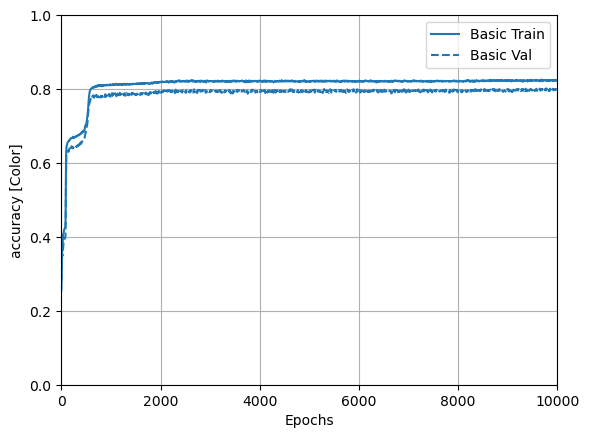

In [28]:
plotter.plot({'Basic': history}, metric = "accuracy")
plt.ylim([0, 1])
plt.ylabel('accuracy [Color]')

Text(0, 0.5, 'loss [Color]')

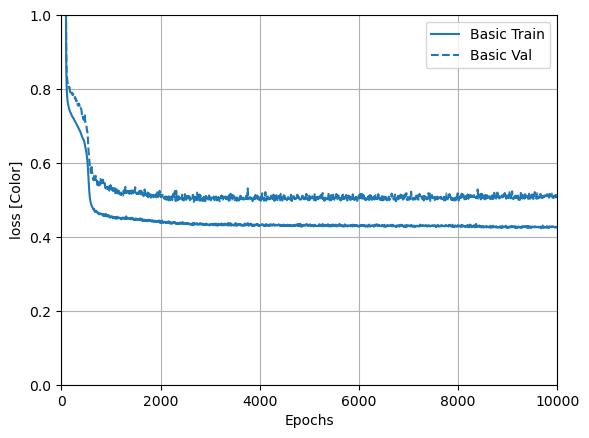

In [29]:
plotter.plot({'Basic': history}, metric = "loss")
plt.ylim([0, 1])
plt.ylabel('loss [Color]')

In [33]:
train_predictions = model.predict(train_dataset)
train_predictions

127/127 [==============================] - 0s 439us/step


array([[ 4.1049566e+00, -5.0793301e+01, -8.7712746e+00, ...,
        -2.3194830e+01, -8.1303015e+02, -3.2073864e+01],
       [-1.4260257e+00, -1.2003857e+01, -2.3951273e+02, ...,
        -1.4062834e+01, -5.7273425e+02, -2.9300318e+01],
       [-7.7917938e+01, -7.1857524e-01, -8.5254639e+01, ...,
        -7.7295482e-01, -7.4502289e+01, -6.0114088e+00],
       ...,
       [-2.7344308e+02, -2.0283859e+01,  5.5181379e+00, ...,
        -7.0501390e+00, -1.5469630e+02, -2.2553829e+01],
       [-6.7822229e+02, -1.2437300e+01,  1.9991856e+01, ...,
        -7.1118627e+00, -1.4172565e+01, -3.3739536e+01],
       [-7.0922620e+02,  2.3001263e+00,  6.3315029e+00, ...,
        -4.3517513e+00, -1.5981472e+01, -1.5461668e+02]], dtype=float32)

In [34]:
actual_encoded_train_labels = np.argmax(train_labels.to_numpy(), axis=1) #train_labels were originally in one-hot
actual_encoded_train_labels

array([5, 4, 7, ..., 6, 2, 2])

In [35]:
predicted_encoded_train_labels = np.argmax(train_predictions, axis=1)
predicted_encoded_train_labels

array([5, 4, 7, ..., 6, 2, 2])

In [36]:
actual_encoded_train_labels = pd.DataFrame(actual_encoded_train_labels, columns=['Labels'])
actual_encoded_train_labels

Labels
0          5
1          4
2          7
3          1
4          3
...      ...
4037       2
4038       2
4039       6
4040       2
4041       2

[4042 rows x 1 columns]

In [37]:
predicted_encoded_train_labels = pd.DataFrame(predicted_encoded_train_labels, columns=['Labels'])
predicted_encoded_train_labels

Labels
0          5
1          4
2          7
3          1
4          3
...      ...
4037       6
4038       2
4039       6
4040       2
4041       2

[4042 rows x 1 columns]

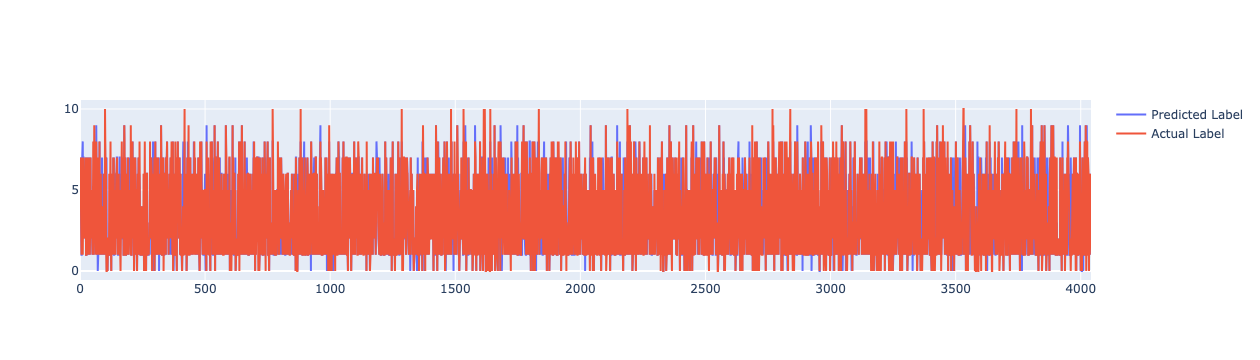

In [38]:
#Plot Actual vs Predicted Class for Training Dataset
actual_chart = go.Scatter(x=actual_encoded_train_labels.index, y=actual_encoded_train_labels.Labels, name= 'Actual Label')
predict_chart = go.Scatter(x=actual_encoded_train_labels.index, y=predicted_encoded_train_labels.Labels, name= 'Predicted Label')
py.iplot([predict_chart, actual_chart])

In [39]:
test_predictions = model.predict(test_dataset)
test_predictions

32/32 [==============================] - 0s 465us/step


array([[-9.1177771e+02, -2.5771670e+00,  1.8139135e+01, ...,
        -6.9948153e+00, -1.9710030e+01, -1.3024223e+02],
       [-1.3883036e+00, -1.3885725e+01, -1.1372912e+02, ...,
        -9.0343018e+00, -3.4827176e+02, -1.7371866e+01],
       [-1.5531703e+00, -2.9640259e+01, -6.2572813e+00, ...,
        -1.1082054e+01, -4.0288605e+02, -1.7220770e+01],
       ...,
       [-2.7584814e+02, -1.8420124e+00, -4.2289896e+00, ...,
         1.6173041e-01,  1.1739168e+00, -6.0931010e+00],
       [-2.7100723e+02, -1.9514608e+00, -4.1946602e+00, ...,
         1.3367724e-01,  1.0572516e+00, -5.9695239e+00],
       [-2.7020050e+02, -1.9697018e+00, -4.1889381e+00, ...,
         1.2900186e-01,  1.0378081e+00, -5.9489317e+00]], dtype=float32)

In [40]:
actual_encoded_test_labels = np.argmax(test_labels.to_numpy(), axis=1) 
actual_encoded_test_labels

array([2, 7, 5, ..., 9, 9, 9])

In [41]:
predicted_encoded_test_labels = np.argmax(test_predictions, axis=1)
predicted_encoded_test_labels

array([2, 7, 5, ..., 9, 9, 9])

In [42]:
actual_encoded_test_labels = pd.DataFrame(actual_encoded_test_labels, columns=['Labels'])
actual_encoded_test_labels

Labels
0          2
1          7
2          5
3          5
4          2
...      ...
1005       9
1006       9
1007       9
1008       9
1009       9

[1010 rows x 1 columns]

In [43]:
predicted_encoded_test_labels = pd.DataFrame(predicted_encoded_test_labels, columns=['Labels'])
predicted_encoded_test_labels

Labels
0          2
1          7
2          5
3          0
4          2
...      ...
1005       9
1006       9
1007       9
1008       9
1009       9

[1010 rows x 1 columns]

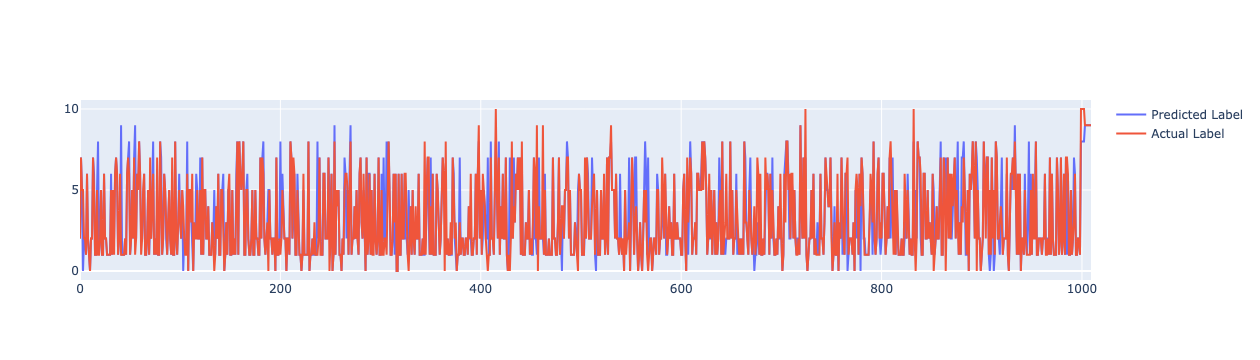

In [44]:
#Plot Actual vs Predicted Class for Test Dataset
actual_chart = go.Scatter(x=actual_encoded_test_labels.index, y=actual_encoded_test_labels.Labels, name= 'Actual Label')
predict_chart = go.Scatter(x=actual_encoded_test_labels.index, y=predicted_encoded_test_labels.Labels, name= 'Predicted Label')
py.iplot([predict_chart, actual_chart])

In [45]:
model.evaluate(x=train_dataset, y=train_labels)

127/127 [==============================] - 0s 496us/step - loss: 0.4688 - accuracy: 0.8132


[0.46876126527786255, 0.8132112622261047]

In [46]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix_train = confusion_matrix(actual_encoded_train_labels, predicted_encoded_train_labels)
confusion_matrix_train

array([[ 137,    0,    0,    0,    3,   36,    1,   15,    0,    0,    0],
       [   0, 1083,   56,   11,    0,    0,    1,    6,    9,    2,    0],
       [   0,   12,  838,    0,    0,    0,   15,    0,    0,    0,    0],
       [   0,   63,    0,  132,    6,    0,    0,   25,    2,    1,    0],
       [  16,    0,    0,   15,   93,    0,    0,   46,    0,    0,    0],
       [   5,    0,    0,    0,    0,  352,   96,    9,    0,    0,    0],
       [   0,    0,   53,    0,    0,   80,  310,    1,    3,    0,    0],
       [   4,    8,    0,   11,   10,   17,    1,  239,   15,    0,    0],
       [   0,   11,   23,    0,    0,    0,   10,    8,   77,   14,    0],
       [   0,    1,    4,    0,    0,    0,    1,    0,    7,   26,    0],
       [   0,    0,    0,    0,    0,    0,    1,    1,   20,    0,    0]])

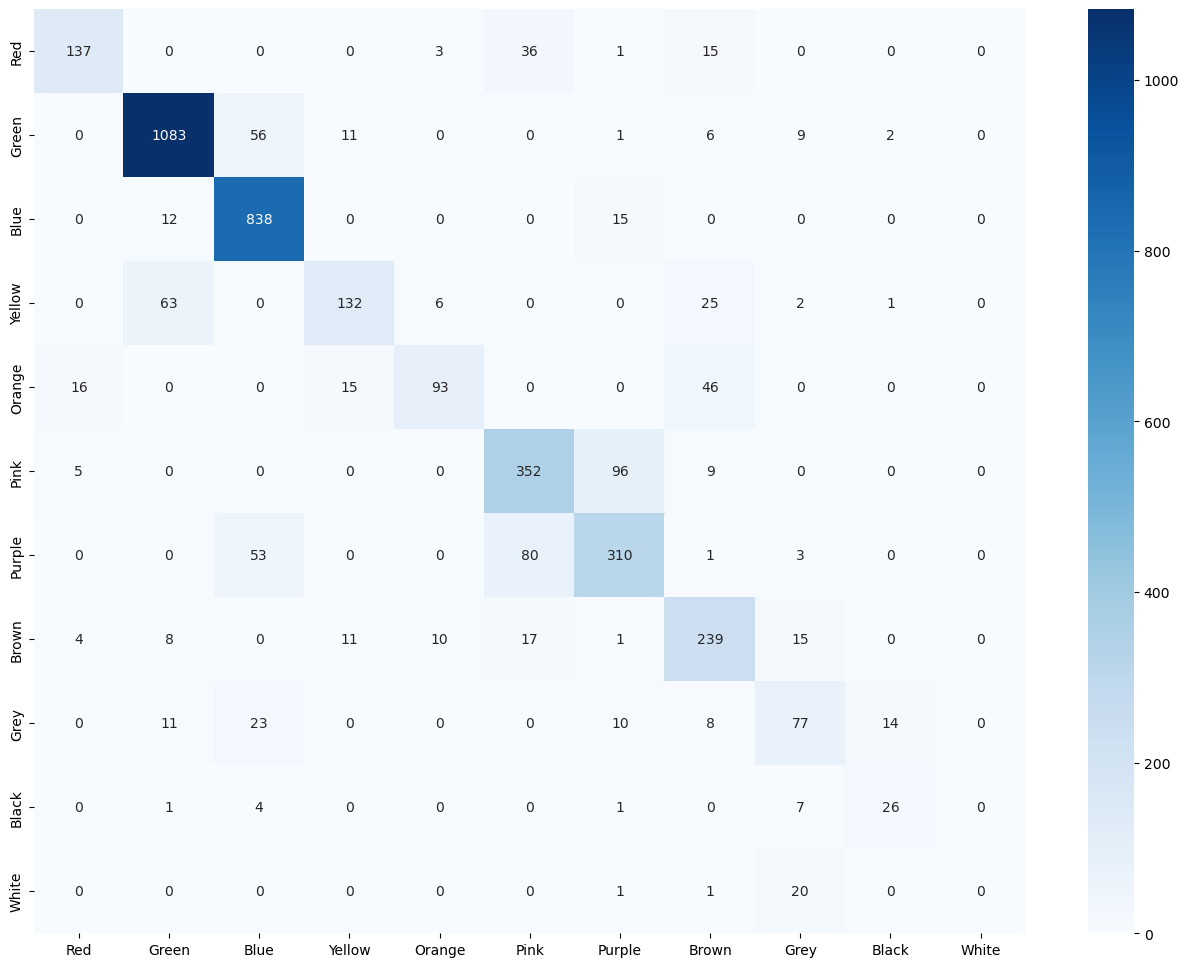

In [47]:
f,ax = plt.subplots(figsize=(16,12))
categories = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
sns.heatmap(confusion_matrix_train, annot=True, cmap='Blues', fmt='d',
            xticklabels = categories,
            yticklabels = categories)
plt.show()

In [48]:
target_names = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
print(classification_report(actual_encoded_train_labels, predicted_encoded_train_labels, target_names=target_names))

              precision    recall  f1-score   support

         Red       0.85      0.71      0.77       192
       Green       0.92      0.93      0.92      1168
        Blue       0.86      0.97      0.91       865
      Yellow       0.78      0.58      0.66       229
      Orange       0.83      0.55      0.66       170
        Pink       0.73      0.76      0.74       462
      Purple       0.71      0.69      0.70       447
       Brown       0.68      0.78      0.73       305
        Grey       0.58      0.54      0.56       143
       Black       0.60      0.67      0.63        39
       White       0.00      0.00      0.00        22

    accuracy                           0.81      4042
   macro avg       0.69      0.65      0.66      4042
weighted avg       0.81      0.81      0.81      4042



/Users/kaushalkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/kaushalkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/kaushalkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [49]:
model.evaluate(x=test_dataset, y=test_labels)

32/32 [==============================] - 0s 1ms/step - loss: 0.4957 - accuracy: 0.8168


[0.4957374036312103, 0.8168317079544067]

In [50]:
confusion_matrix_test = confusion_matrix(actual_encoded_test_labels, predicted_encoded_test_labels)
confusion_matrix_test

array([[ 30,   0,   0,   0,   0,   9,   0,   5,   0,   0,   0],
       [  0, 266,  13,   2,   0,   0,   0,   1,   5,   2,   0],
       [  0,   2, 234,   0,   0,   0,   6,   0,   0,   0,   0],
       [  0,  13,   0,  30,   1,   0,   0,  10,   2,   0,   0],
       [  5,   0,   0,   2,  20,   0,   0,   8,   0,   0,   0],
       [  3,   0,   0,   0,   0,  89,  21,   4,   0,   0,   0],
       [  0,   0,  18,   0,   0,  11,  73,   0,   4,   0,   0],
       [  1,   1,   0,   6,   3,   1,   1,  52,   6,   0,   0],
       [  0,   1,   2,   0,   0,   0,   0,   2,  23,   3,   0],
       [  0,   1,   1,   0,   0,   0,   0,   0,   2,   8,   0],
       [  0,   0,   0,   0,   0,   0,   0,   1,   6,   0,   0]])

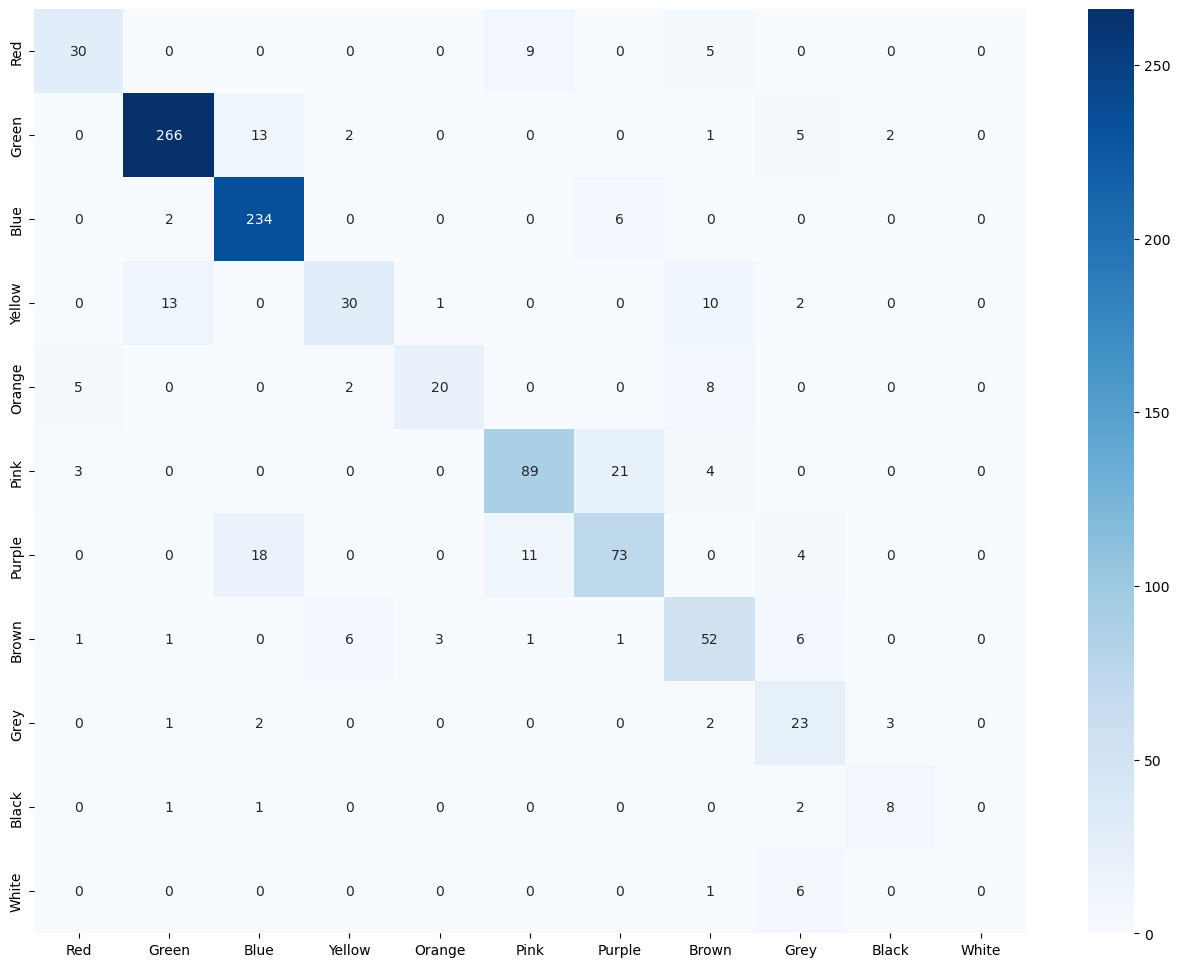

In [51]:
f,ax = plt.subplots(figsize=(16,12))
categories = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
sns.heatmap(confusion_matrix_test, annot=True, cmap='Blues', fmt='d',
            xticklabels = categories,
            yticklabels = categories)
plt.show()

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS]
converter.target_spec.supported_ops.append(tf.lite.OpsSet.SELECT_TF_OPS)
converter._experimental_lower_tensor_list_ops = False
tflite_model = converter.convert()
with open("Models/SER.tflite", 'wb') as f:
    f.write(tflite_model)


converter.optimizations = [tf.lite.Optimize.DEFAULT]
quant_tflite_model = converter.convert()
with tf.io.gfile.GFile("Models/SER_quant.tflite", 'wb') as f:
   f.write(quant_tflite_model)

In [53]:
target_names = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
print(classification_report(actual_encoded_test_labels, predicted_encoded_test_labels, target_names=target_names

              precision    recall  f1-score   support

         Red       0.77      0.68      0.72        44
       Green       0.94      0.92      0.93       289
        Blue       0.87      0.97      0.92       242
      Yellow       0.75      0.54      0.63        56
      Orange       0.83      0.57      0.68        35
        Pink       0.81      0.76      0.78       117
      Purple       0.72      0.69      0.71       106
       Brown       0.63      0.73      0.68        71
        Grey       0.48      0.74      0.58        31
       Black       0.62      0.67      0.64        12
       White       0.00      0.00      0.00         7

    accuracy                           0.82      1010
   macro avg       0.67      0.66      0.66      1010
weighted avg       0.82      0.82      0.81      1010



/Users/kaushalkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/kaushalkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/Users/kaushalkumar/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

